<a href="https://colab.research.google.com/github/Nagarjun-CS/Health_Care_Bill_Prediction/blob/main/Health_Care_Bill_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip
from datetime import datetime, timedelta
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
Dataset = pd.read_excel("/content/drive/MyDrive/Data Analysis Projects/healthcare_dataset.xlsx")
Dataset

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,Room Type
0,Tiffany Ramirez,81,Female,O-,Cancer,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,77140.534226,Elective,2022-12-01,Aspirin,Inconclusive,Special Private
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,64655.668885,Emergency,2023-06-15,Lipitor,Normal,Standard Room
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,60252.130746,Emergency,2019-02-08,Lipitor,Normal,Standard Room
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,34175.861573,Urgent,2020-05-03,Penicillin,Abnormal,Special Private
4,Mrs. Brandy Flowers,51,Male,O-,Obesity,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,31652.665249,Urgent,2021-08-02,Paracetamol,Normal,Special Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,73937.026370,Elective,2022-08-02,Ibuprofen,Abnormal,Semi-Private
9996,Stephanie Evans,47,Female,AB+,Diabetes,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,8943.051316,Emergency,2022-01-29,Ibuprofen,Normal,Semi-Private
9997,Christopher Martinez,54,Female,B-,Diabetes,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,77602.222905,Elective,2022-07-15,Ibuprofen,Normal,Standard Room
9998,Amanda Duke,84,Male,A+,Cancer,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,46392.174634,Urgent,2020-02-26,Penicillin,Normal,Standard Room


In [4]:
healthCareData = Dataset.copy()

In [5]:
healthCareData.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,Room Type
0,Tiffany Ramirez,81,Female,O-,Cancer,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,77140.534226,Elective,2022-12-01,Aspirin,Inconclusive,Special Private
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,64655.668885,Emergency,2023-06-15,Lipitor,Normal,Standard Room
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,60252.130746,Emergency,2019-02-08,Lipitor,Normal,Standard Room
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,34175.861573,Urgent,2020-05-03,Penicillin,Abnormal,Special Private
4,Mrs. Brandy Flowers,51,Male,O-,Obesity,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,31652.665249,Urgent,2021-08-02,Paracetamol,Normal,Special Private


In [6]:
healthCareData.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [7]:
healthCareData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Admission Type      10000 non-null  object 
 11  Discharge Date      10000 non-null  object 
 12  Medication          10000 non-null  object 
 13  Test Results        10000 non-null  object 
 14  Room Type           10000 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 1.1+

In [8]:
healthCareData.describe()

,Age,Billing Amount
count,10000.000000,10000.000000
mean,51.452200,39294.869190
std,19.588974,22549.181476
min,18.000000,1233.997141
25%,35.000000,20309.014350
50%,52.000000,38227.830792
75%,68.000000,56976.406025
max,85.000000,102283.272223


In [9]:
# Count of unique values for categorical columns
healthCareData['Medical Condition'].value_counts()
healthCareData['Admission Type'].value_counts()
healthCareData['Room Type'].value_counts()

,count
Room Type,
Standard Room,3364
Special Private,3361
Semi-Private,3275


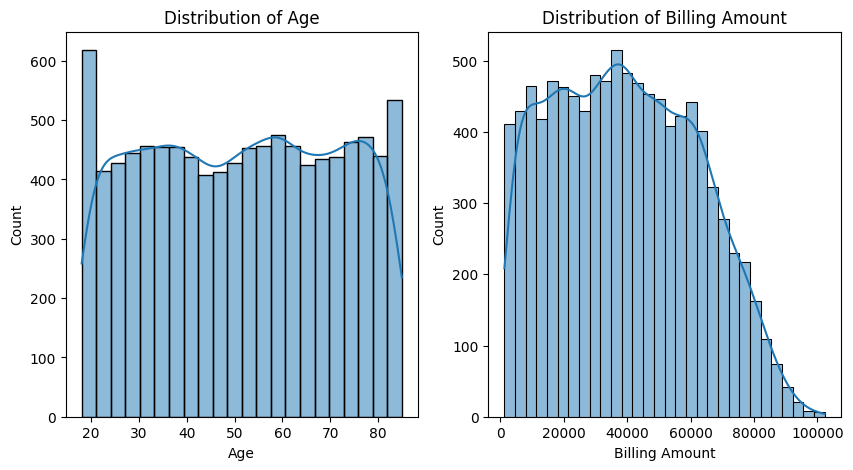

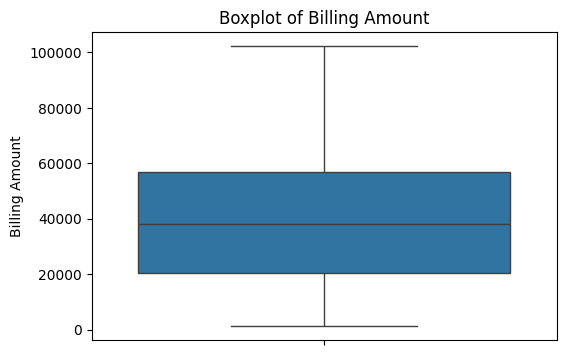

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Age and Billing Amount
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.histplot(healthCareData['Age'], kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
sns.histplot(healthCareData['Billing Amount'], kde=True)
plt.title('Distribution of Billing Amount')
plt.show()

# Boxplot for Billing Amount
plt.figure(figsize=(6, 4))
sns.boxplot(y=healthCareData['Billing Amount'])
plt.title('Boxplot of Billing Amount')
plt.show()


<ipython-input-11-c3be45406ab6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Medical Condition', data=healthCareData, palette=custom_palette, order=condition_order)
<ipython-input-11-c3be45406ab6>:10: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y='Medical Condition', data=healthCareData, palette=custom_palette, order=condition_order)


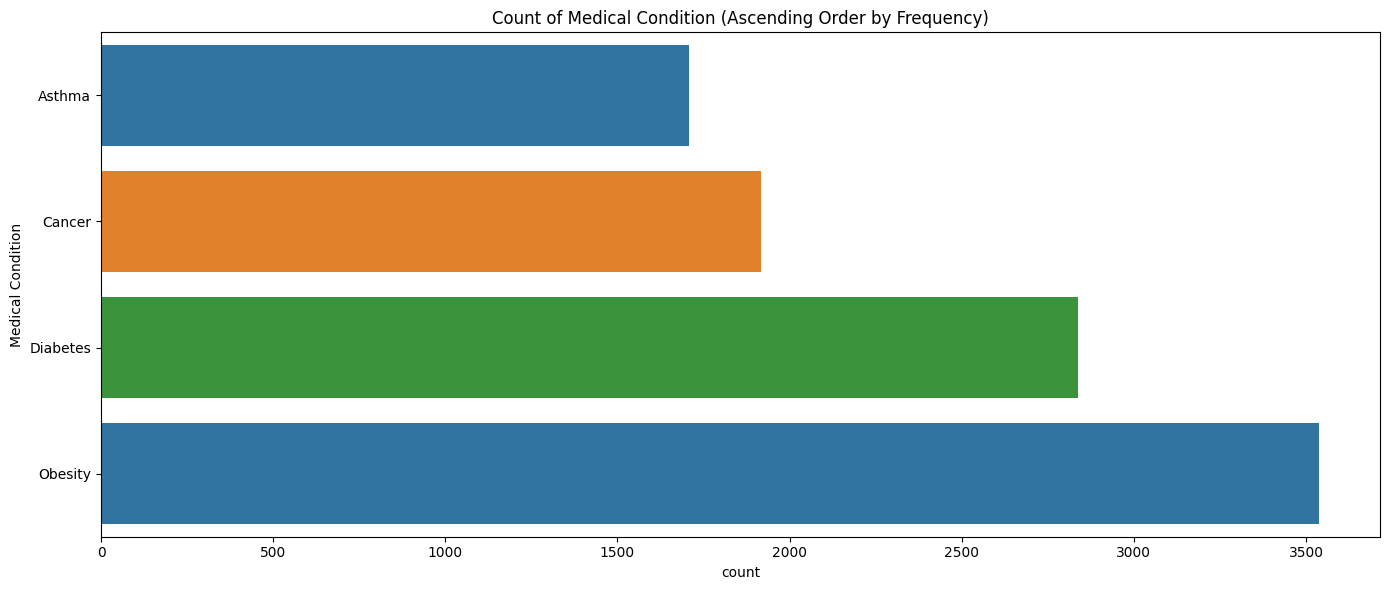

In [11]:
# Define a custom color palette with three different colors
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Get the value counts of the 'Medical Condition' in ascending order
condition_order = healthCareData['Medical Condition'].value_counts(ascending=True).index

# Count plot for 'Medical Condition' in ascending order of frequency
plt.figure(figsize=(14,6))

sns.countplot(y='Medical Condition', data=healthCareData, palette=custom_palette, order=condition_order)
plt.title('Count of Medical Condition (Ascending Order by Frequency)')

plt.tight_layout()
plt.show()


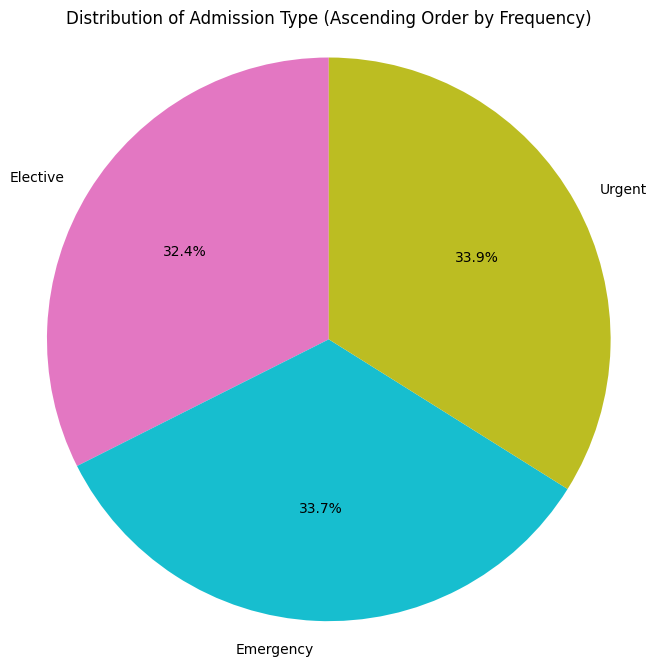

In [12]:
import matplotlib.pyplot as plt

# Get the value counts of the 'Admission Type' in ascending order
admission_counts = healthCareData['Admission Type'].value_counts(ascending=True)

# Define a custom color palette for the pie chart
colors = ['#e377c2', '#17becf', '#bcbd22']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(admission_counts, labels=admission_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Admission Type (Ascending Order by Frequency)')
plt.axis('equal')  # Ensures the pie chart is circular

plt.show()


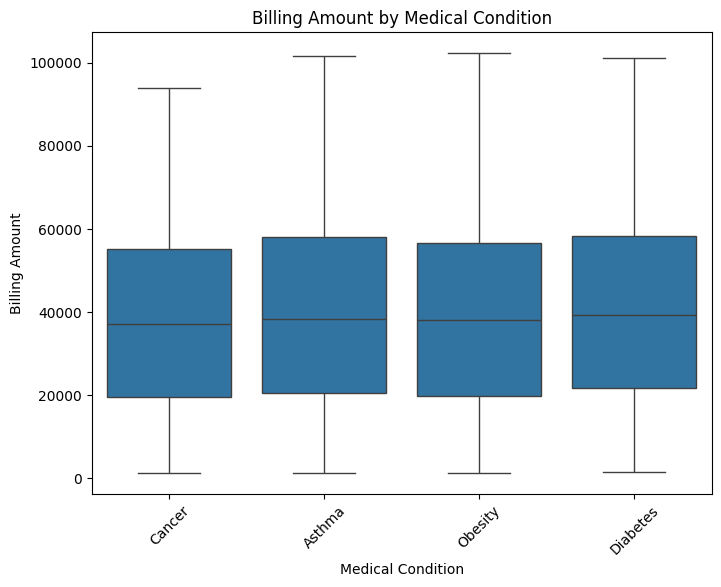

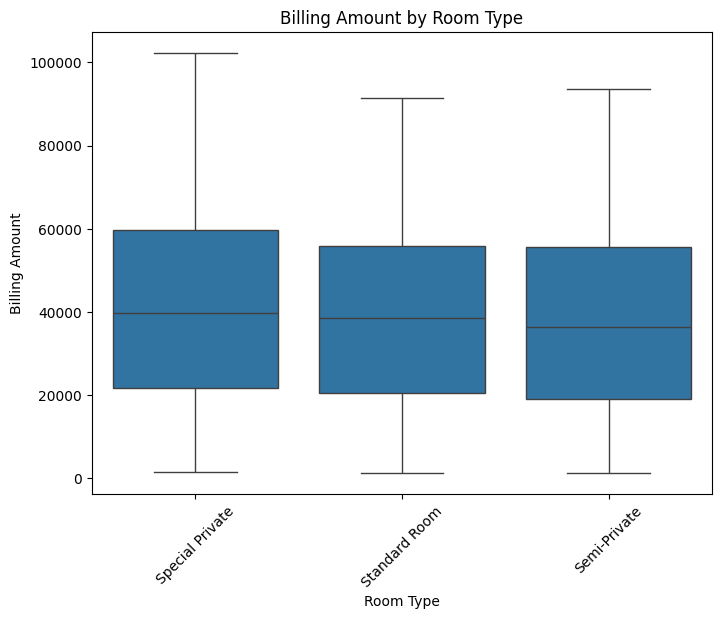

In [13]:
# Boxplot for Medical Condition vs Billing Amount
plt.figure(figsize=(8,6))
sns.boxplot(x='Medical Condition', y='Billing Amount', data=healthCareData)
plt.title('Billing Amount by Medical Condition')
plt.xticks(rotation=45)
plt.show()

# Boxplot for Room Type vs Billing Amount
plt.figure(figsize=(8,6))
sns.boxplot(x='Room Type', y='Billing Amount', data=healthCareData)
plt.title('Billing Amount by Room Type')
plt.xticks(rotation=45)
plt.show()


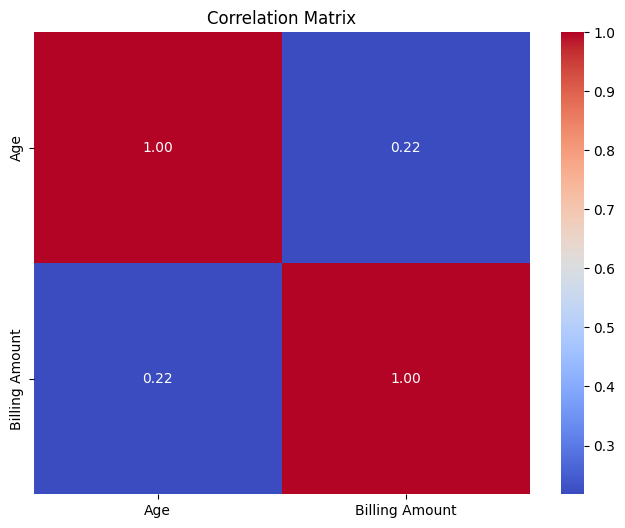

In [14]:
# Exclude non-numerical columns before calculating the correlation matrix
numerical_columns = healthCareData.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix for numerical columns only
corr_matrix = numerical_columns.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [15]:
healthCareData

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,Room Type
0,Tiffany Ramirez,81,Female,O-,Cancer,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,77140.534226,Elective,2022-12-01,Aspirin,Inconclusive,Special Private
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,64655.668885,Emergency,2023-06-15,Lipitor,Normal,Standard Room
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,60252.130746,Emergency,2019-02-08,Lipitor,Normal,Standard Room
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,34175.861573,Urgent,2020-05-03,Penicillin,Abnormal,Special Private
4,Mrs. Brandy Flowers,51,Male,O-,Obesity,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,31652.665249,Urgent,2021-08-02,Paracetamol,Normal,Special Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,73937.026370,Elective,2022-08-02,Ibuprofen,Abnormal,Semi-Private
9996,Stephanie Evans,47,Female,AB+,Diabetes,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,8943.051316,Emergency,2022-01-29,Ibuprofen,Normal,Semi-Private
9997,Christopher Martinez,54,Female,B-,Diabetes,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,77602.222905,Elective,2022-07-15,Ibuprofen,Normal,Standard Room
9998,Amanda Duke,84,Male,A+,Cancer,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,46392.174634,Urgent,2020-02-26,Penicillin,Normal,Standard Room


In [16]:
healthCareData.keys()

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Admission Type', 'Discharge Date', 'Medication',
       'Test Results', 'Room Type'],
      dtype='object')

In [17]:
desired_columns = [ 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider',
       'Billing Amount', 'Admission Type',
       'Test Results', 'Room Type',]
healthCareData = healthCareData[desired_columns]

In [18]:
shape = healthCareData.shape

num_rows = shape[0]
num_columns = shape[1]

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 10000
Number of columns: 9


In [19]:
healthCareData.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Test Results,Room Type
0,81,Female,O-,Cancer,Medicare,77140.534226,Elective,Inconclusive,Special Private
1,35,Male,O+,Asthma,UnitedHealthcare,64655.668885,Emergency,Normal,Standard Room
2,61,Male,B-,Obesity,Medicare,60252.130746,Emergency,Normal,Standard Room
3,49,Male,B-,Asthma,Medicare,34175.861573,Urgent,Abnormal,Special Private
4,51,Male,O-,Obesity,UnitedHealthcare,31652.665249,Urgent,Normal,Special Private


In [20]:
healthCareData.dtypes

,0
Age,int64
Gender,object
Blood Type,object
Medical Condition,object
Insurance Provider,object
Billing Amount,float64
Admission Type,object
Test Results,object
Room Type,object


In [21]:
healthCareData['Gender'] = healthCareData['Gender'].astype('category')
healthCareData['Blood Type'] = healthCareData['Blood Type'].astype('category')
healthCareData['Medical Condition'] = healthCareData['Medical Condition'].astype('category')
healthCareData['Insurance Provider'] = healthCareData['Insurance Provider'].astype('category')
healthCareData['Admission Type'] = healthCareData['Admission Type'].astype('category')
healthCareData['Test Results'] = healthCareData['Test Results'].astype('category')
healthCareData['Room Type'] = healthCareData['Room Type'].astype('category')

<ipython-input-21-e7472486d5d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthCareData['Gender'] = healthCareData['Gender'].astype('category')
<ipython-input-21-e7472486d5d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthCareData['Blood Type'] = healthCareData['Blood Type'].astype('category')
<ipython-input-21-e7472486d5d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [22]:
healthCareData.dtypes

,0
Age,int64
Gender,category
Blood Type,category
Medical Condition,category
Insurance Provider,category
Billing Amount,float64
Admission Type,category
Test Results,category
Room Type,category


In [23]:
healthCareData = pd.get_dummies(healthCareData, columns=['Gender','Blood Type','Medical Condition','Insurance Provider', 'Admission Type', 'Test Results', 'Room Type'], drop_first=True)
healthCareData

,Age,Billing Amount,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,...,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Test Results_Inconclusive,Test Results_Normal,Room Type_Special Private,Room Type_Standard Room
0,81,77140.534226,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,True,False,True,False
1,35,64655.668885,True,False,False,False,False,False,True,False,...,False,False,False,True,True,False,False,True,False,True
2,61,60252.130746,True,False,False,False,False,True,False,False,...,False,False,True,False,True,False,False,True,False,True
3,49,34175.861573,True,False,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,True,False
4,51,31652.665249,True,False,False,False,False,False,False,True,...,False,False,False,True,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,83,73937.026370,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
9996,47,8943.051316,False,False,True,False,False,False,False,False,...,True,False,False,False,True,False,False,True,False,False
9997,54,77602.222905,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,True
9998,84,46392.174634,True,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,True


In [24]:
for column in healthCareData.columns:
    if healthCareData[column].dtype == 'bool':
        healthCareData[column] = healthCareData[column].astype(int)

healthCareData

,Age,Billing Amount,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,...,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Test Results_Inconclusive,Test Results_Normal,Room Type_Special Private,Room Type_Standard Room
0,81,77140.534226,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,35,64655.668885,1,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,1,0,1
2,61,60252.130746,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,1
3,49,34175.861573,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
4,51,31652.665249,1,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,83,73937.026370,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9996,47,8943.051316,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
9997,54,77602.222905,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
9998,84,46392.174634,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1


In [25]:
healthCareData.corr()

,Age,Billing Amount,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,...,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Test Results_Inconclusive,Test Results_Normal,Room Type_Special Private,Room Type_Standard Room
Age,1.000000,0.217382,-0.004372,-0.011017,0.001788,-0.002564,0.009987,-0.011896,0.000124,-0.003806,...,-0.002790,-0.015044,-0.009226,0.015040,-0.002826,0.004191,-0.009254,0.012275,-0.012114,0.020268
Billing Amount,0.217382,1.000000,0.002311,0.016470,0.010151,0.001479,-0.000763,0.001418,-0.005132,-0.000115,...,0.005936,-0.001692,-0.019408,0.000032,-0.040006,0.024259,0.004727,-0.005029,0.059736,-0.012593
Gender_Male,-0.004372,0.002311,1.000000,-0.004860,-0.000593,-0.006748,0.008894,-0.005547,-0.003524,0.013372,...,0.027007,-0.004919,-0.026818,0.006280,0.002856,-0.003298,-0.003938,-0.003418,-0.004290,-0.005377
Blood Type_A-,-0.011017,0.016470,-0.004860,1.000000,-0.157997,-0.078714,-0.109633,-0.169327,-0.243518,-0.160870,...,0.013236,-0.006306,0.000488,-0.004799,0.010809,-0.010173,-0.008531,0.004996,0.001163,0.007122
Blood Type_AB+,0.001788,0.010151,-0.000593,-0.157997,1.000000,-0.062079,-0.086463,-0.133542,-0.192053,-0.126872,...,0.004635,-0.000025,0.003806,-0.009727,-0.006784,0.010281,0.005368,-0.009499,0.011197,-0.007910
Blood Type_AB-,-0.002564,0.001479,-0.006748,-0.078714,-0.062079,1.000000,-0.043076,-0.066531,-0.095681,-0.063208,...,-0.013053,0.014256,-0.030852,0.018631,0.007430,-0.000904,-0.002885,0.004987,-0.015922,0.008784
Blood Type_B+,0.009987,-0.000763,0.008894,-0.109633,-0.086463,-0.043076,1.000000,-0.092663,-0.133264,-0.088035,...,-0.011842,0.015611,-0.002146,0.004395,-0.001440,0.000063,0.012467,0.008385,0.004368,-0.005864
Blood Type_B-,-0.011896,0.001418,-0.005547,-0.169327,-0.133542,-0.066531,-0.092663,1.000000,-0.205826,-0.135970,...,-0.006313,-0.001806,0.012255,-0.000490,-0.013778,-0.006098,-0.013056,-0.001951,-0.013303,-0.001390
Blood Type_O+,0.000124,-0.005132,-0.003524,-0.243518,-0.192053,-0.095681,-0.133264,-0.205826,1.000000,-0.195545,...,0.005856,0.000038,-0.008259,0.009702,-0.000011,0.007797,0.016003,-0.015330,-0.006380,0.016467
Blood Type_O-,-0.003806,-0.000115,0.013372,-0.160870,-0.126872,-0.063208,-0.088035,-0.135970,-0.195545,1.000000,...,-0.015195,-0.004191,0.018949,-0.001012,0.011844,-0.012563,-0.013312,0.011559,0.014966,-0.023833


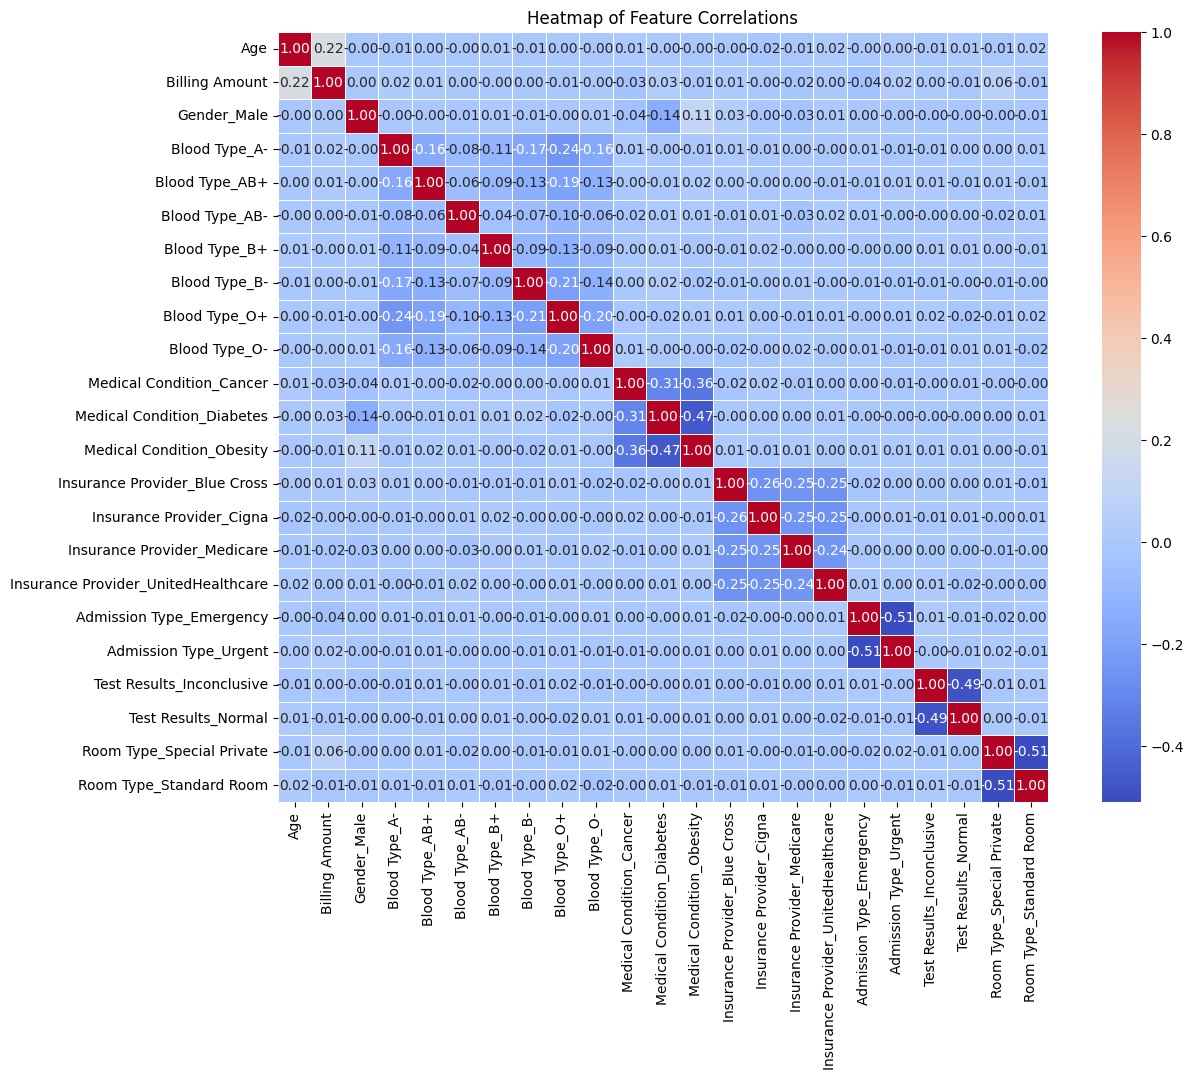

In [26]:
corr = healthCareData.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

plt.title('Heatmap of Feature Correlations')
plt.show()

In [27]:
target = healthCareData['Billing Amount']
predictors = healthCareData.drop(['Billing Amount'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(7000, 22) (3000, 22) (7000,) (3000,)


Text(0.5, 1.0, 'Histogram of expenses in the training data set')

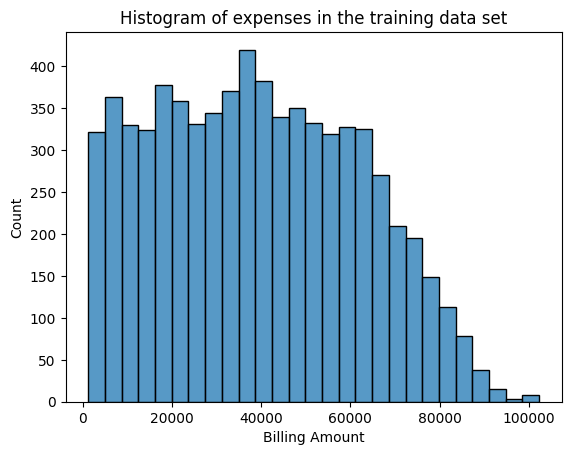

In [28]:
# Examine the distribution of target variable for training data set
snsplot = sns.histplot(data = target_train)
snsplot.set_title("Histogram of expenses in the training data set")

Text(0.5, 1.0, 'Histogram of expenses in the testing data set')

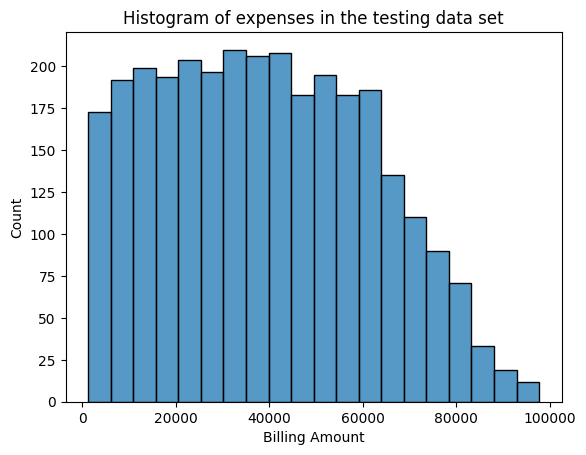

In [29]:
# Examine the distribution of target variable for testing data set
snsplot = sns.histplot(data = target_test)
snsplot.set_title("Histogram of expenses in the testing data set")

In [30]:
# Build a simple linear regression model with only bmi as predictor
model1 = linear_model.LinearRegression()
model1.fit(predictors_train, target_train)

LinearRegression()

In [31]:
# Show model summary
import statsmodels.api as sm
X2 = sm.add_constant(predictors_train)
y = target_train
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         Billing Amount   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     17.46
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           7.86e-66
Time:                        20:04:15   Log-Likelihood:                -79918.
No. Observations:                7000   AIC:                         1.599e+05
Df Residuals:                    6977   BIC:                         1.600e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [32]:
prediction_on_test = model1.predict(predictors_test)

In [33]:
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 18604.325520339553
RMSE: 21780.923086341616


Feature


In [35]:
Dataset['Date of Admission'] = pd.to_datetime(Dataset['Date of Admission'])
Dataset['Discharge Date'] = pd.to_datetime(Dataset['Discharge Date'])

# Calculate length of stay in days
healthCareData['Length of Stay'] = (Dataset['Discharge Date'] - Dataset['Date of Admission']).dt.days


In [38]:
healthCareData['AgeAbove50_Cancer_PrivateRoom'] = np.where(
    (healthCareData['Age'] > 50) &
    (healthCareData['Medical Condition_Cancer'] == 1) &
    (healthCareData['Room Type_Special Private'] == 1), 1, 0
)

In [39]:
healthCareData

,Age,Billing Amount,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,...,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Test Results_Inconclusive,Test Results_Normal,Room Type_Special Private,Room Type_Standard Room,Length of Stay,AgeAbove50_Cancer_PrivateRoom
0,81,77140.534226,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,1,0,14,1
1,35,64655.668885,1,0,0,0,0,0,1,0,...,0,1,1,0,0,1,0,1,14,0
2,61,60252.130746,1,0,0,0,0,1,0,0,...,1,0,1,0,0,1,0,1,30,0
3,49,34175.861573,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
4,51,31652.665249,1,0,0,0,0,0,0,1,...,0,1,0,1,0,1,1,0,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,83,73937.026370,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,4,0
9996,47,8943.051316,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,23,0
9997,54,77602.222905,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,14,0
9998,84,46392.174634,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,20,0


In [40]:
target = healthCareData['Billing Amount']
predictors = healthCareData.drop(['Billing Amount'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(7000, 24) (3000, 24) (7000,) (3000,)


In [41]:
model2 = linear_model.LinearRegression()
model2.fit(predictors_train, target_train)

LinearRegression()

In [42]:
# Show model summary
import statsmodels.api as sm
X2 = sm.add_constant(predictors_train)
y = target_train
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         Billing Amount   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     16.03
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           9.27e-65
Time:                        20:14:47   Log-Likelihood:                -79918.
No. Observations:                7000   AIC:                         1.599e+05
Df Residuals:                    6975   BIC:                         1.601e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [43]:
prediction_on_test = model2.predict(predictors_test)

In [44]:
MAE = mean_absolute_error(target_test, prediction_on_test)
RMSE = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 18601.232631185547
RMSE: 21779.011125121335
